# Mall Customer Segmentation Analysis

In [85]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset

path = 'data/mall_customers_data.csv'
df = pd.read_csv(path)

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Data Visualization

In [7]:
plt.style.use('fivethirtyeight')

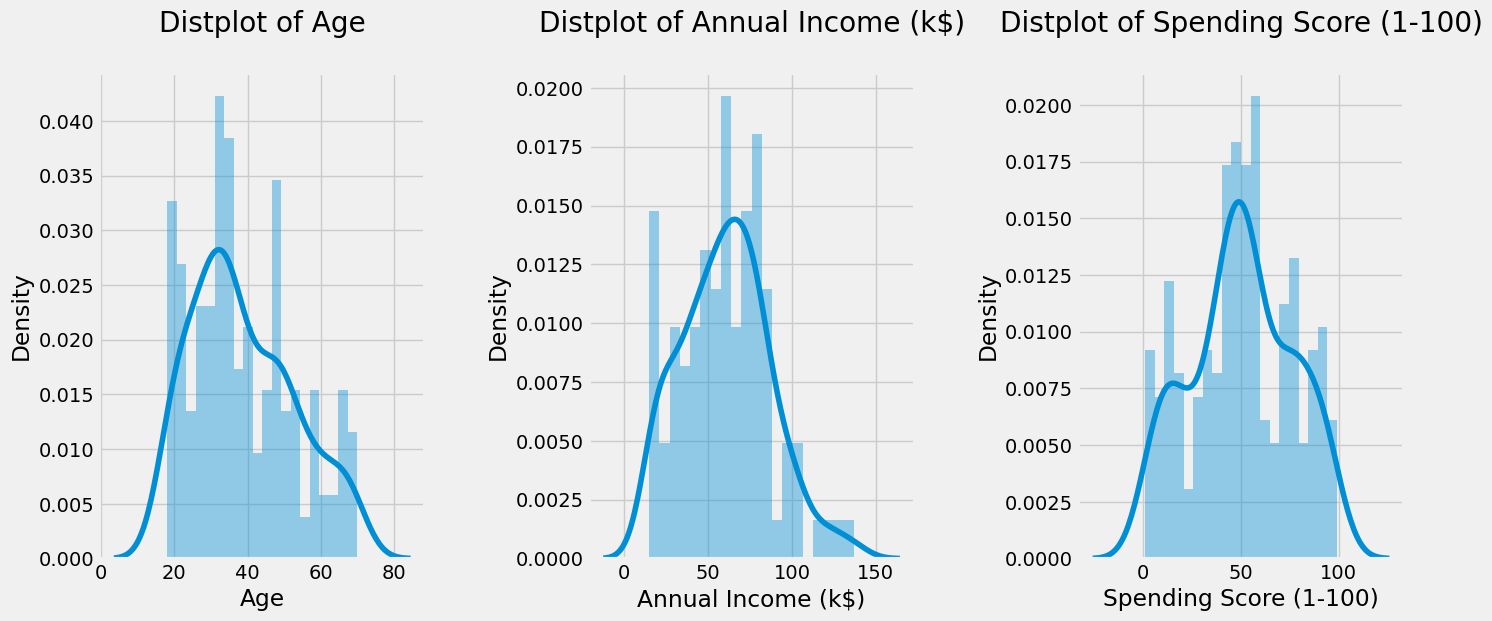

In [8]:
# Plotting Histograms

plt.figure(figsize=(15,6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title(f'Distplot of {x}\n')
plt.show()

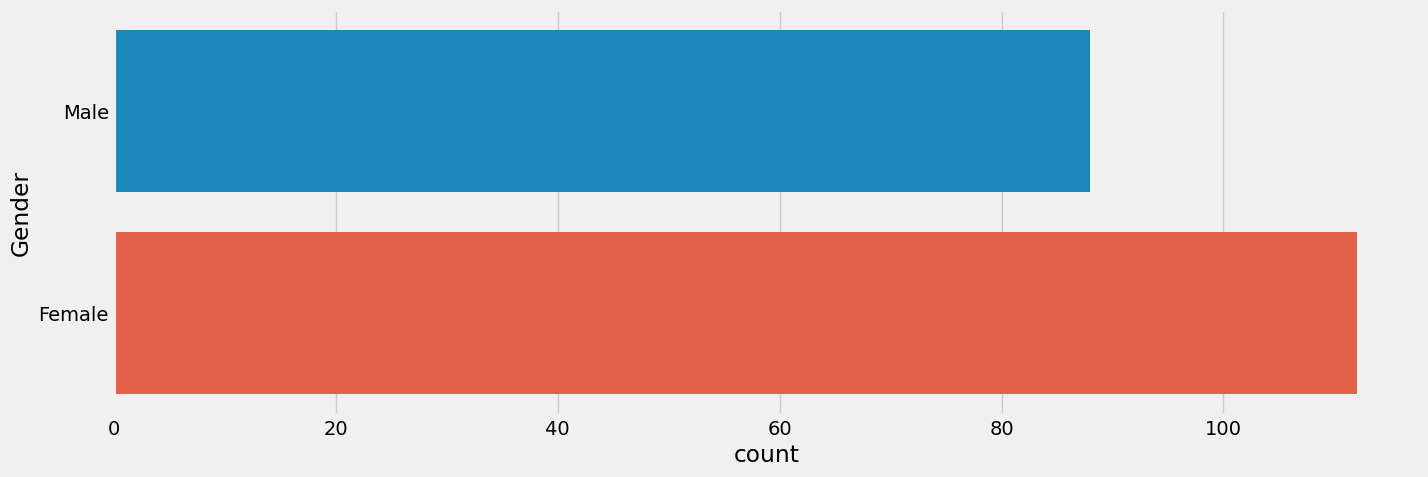

In [9]:
# Plotting Gender count

plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

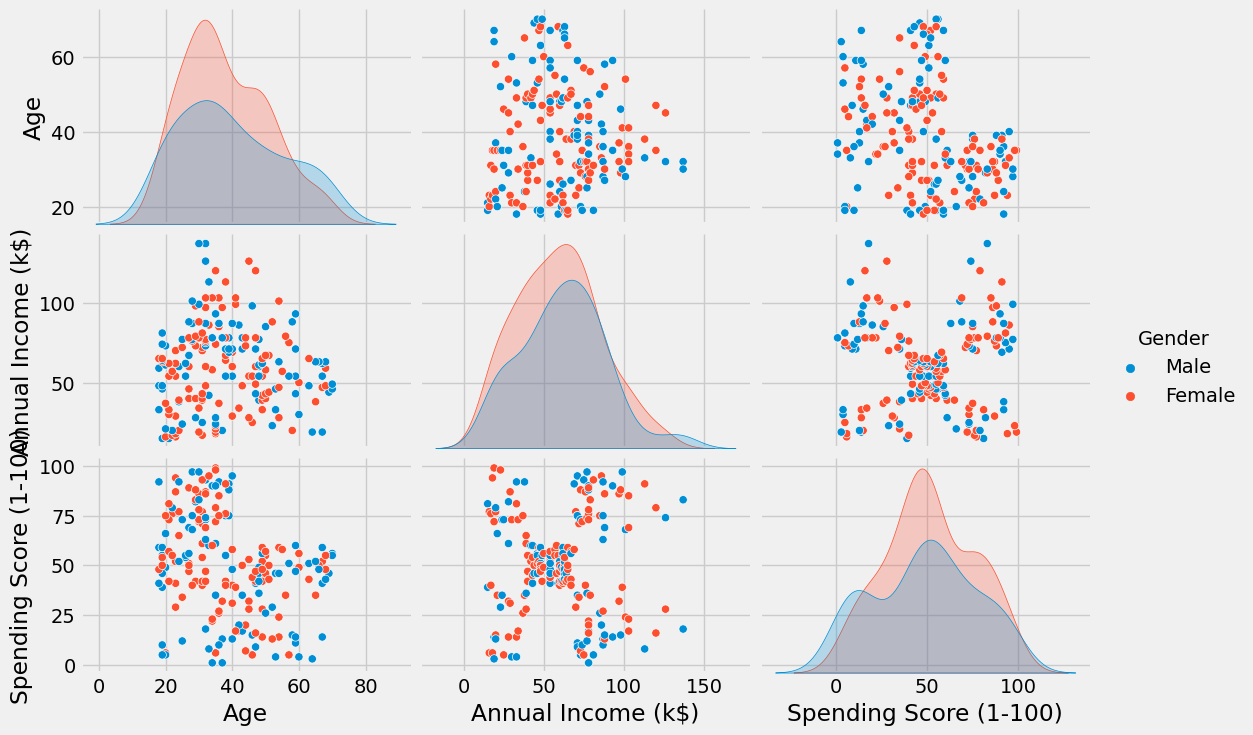

In [55]:
# Plotting Pairplot 

sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

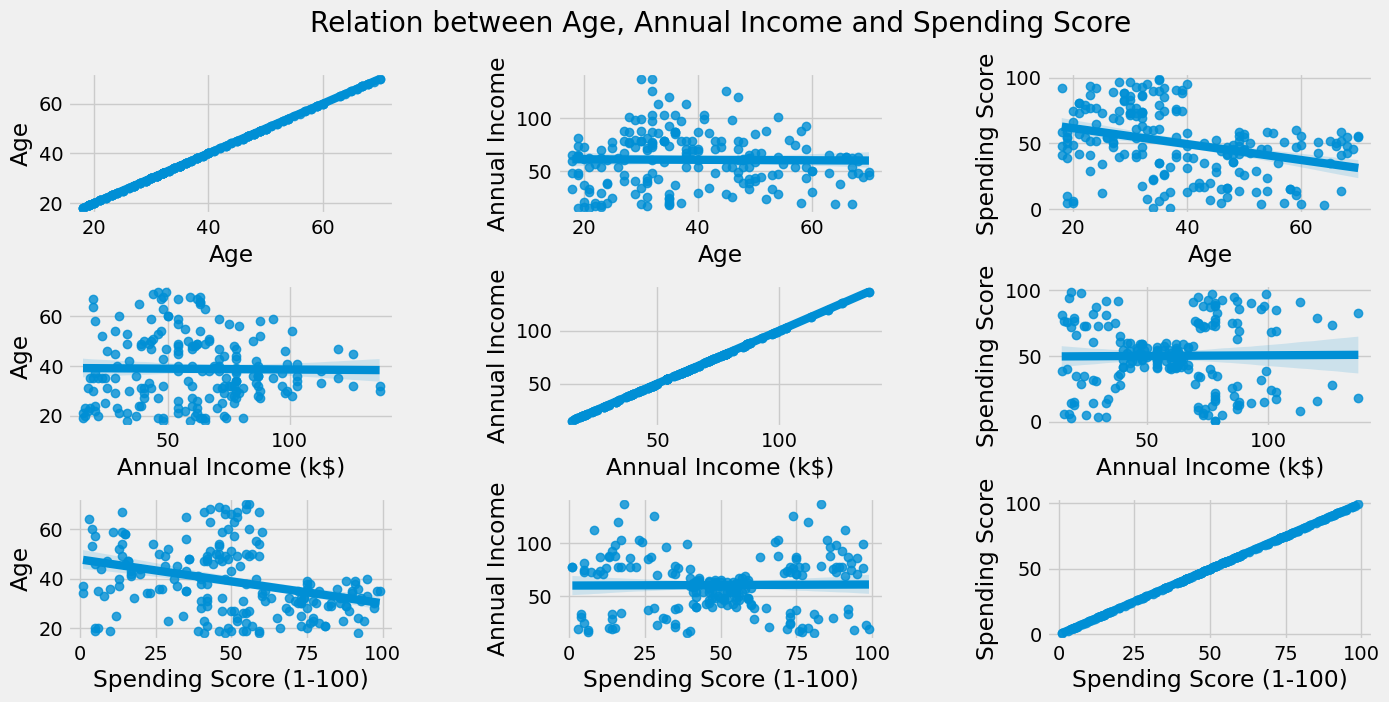

In [57]:
# Plotting Regression model for Age, Annual Income and Spending Score

plt.figure(figsize=(15,7))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)  
        plt.title('Relation between Age, Annual Income and Spending Score\n' if n == 2 else '')
plt.show()

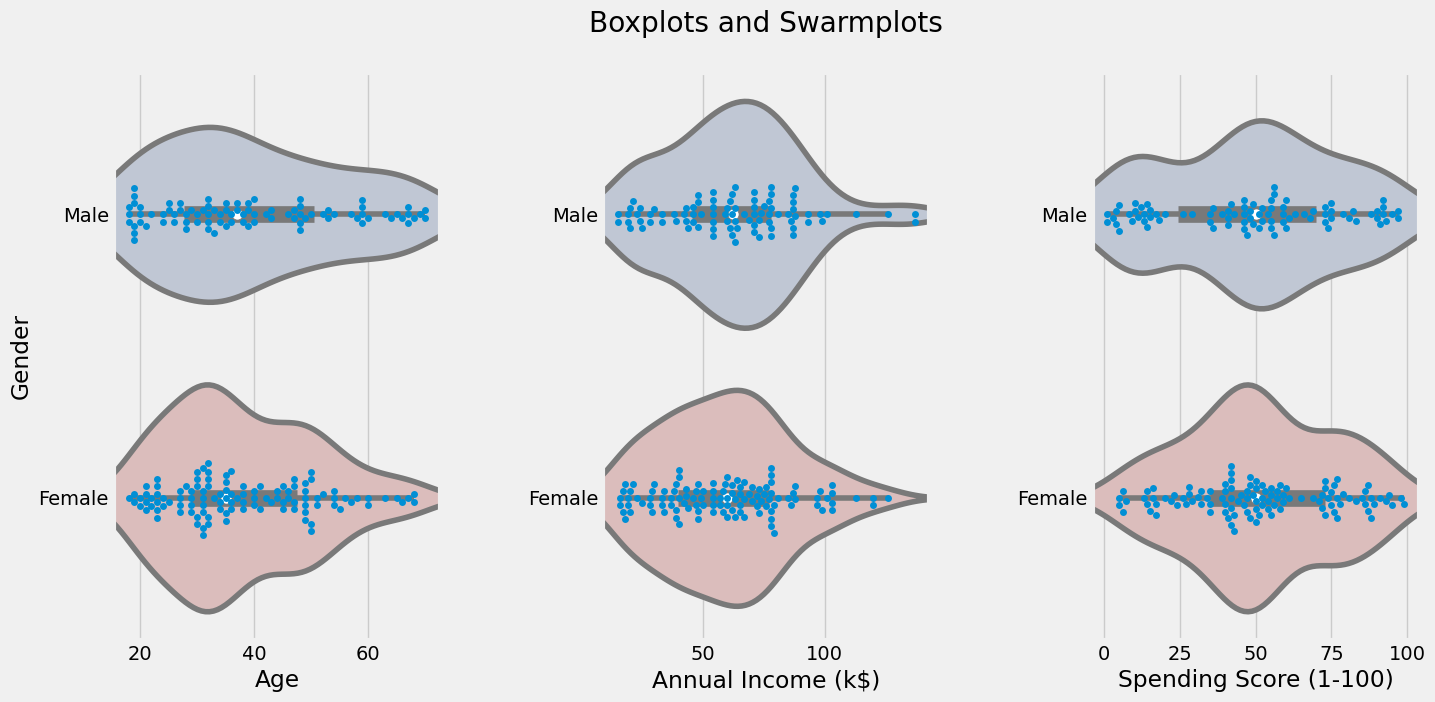

In [18]:
# Distribution of values in Age, Annual Income and Spending Score w.r.t Gender

plt.figure(figsize=(15, 7))
n = 0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df, palette = 'vlag')
    sns.swarmplot(x = cols, y = 'Gender',data =df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots and Swarmplots\n' if n == 2 else '')
plt.show()

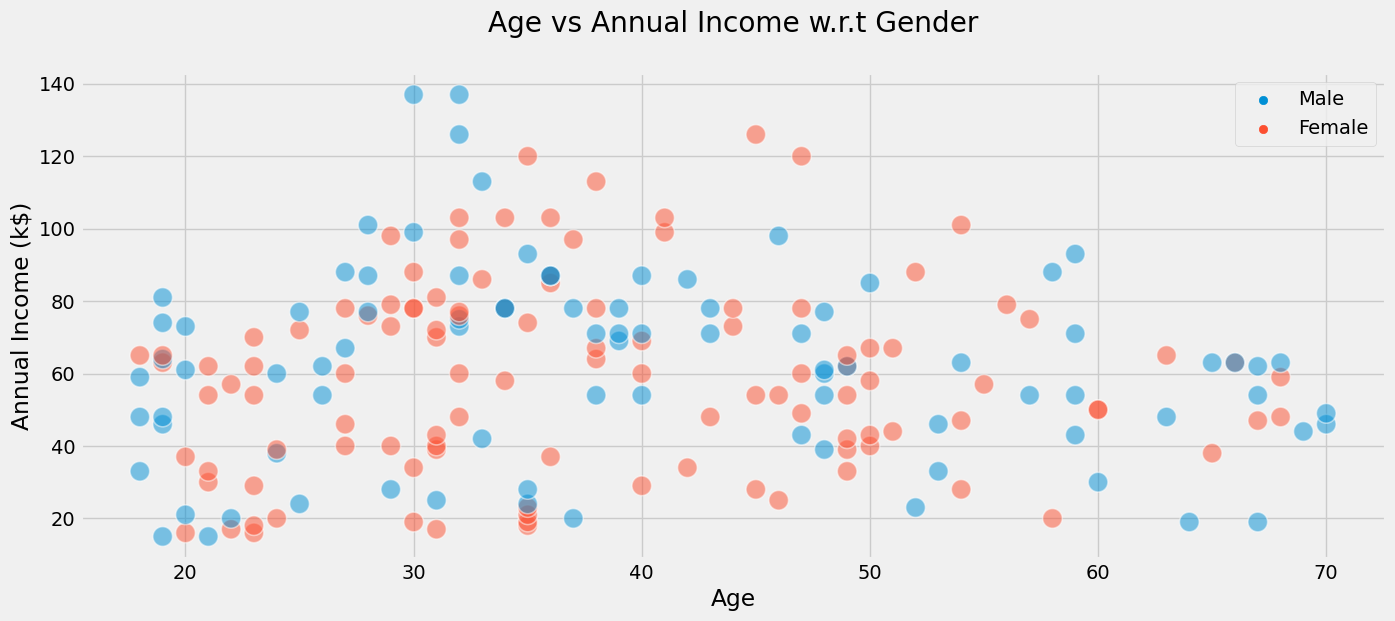

In [64]:
# Plotting scatter plot between Annual Income and Spending Score

plt.figure(figsize=(15, 6))

sns.scatterplot(x = df['Age'], y = df['Annual Income (k$)'], hue= df['Gender'], s = 200, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender\n')
plt.legend()
plt.show()

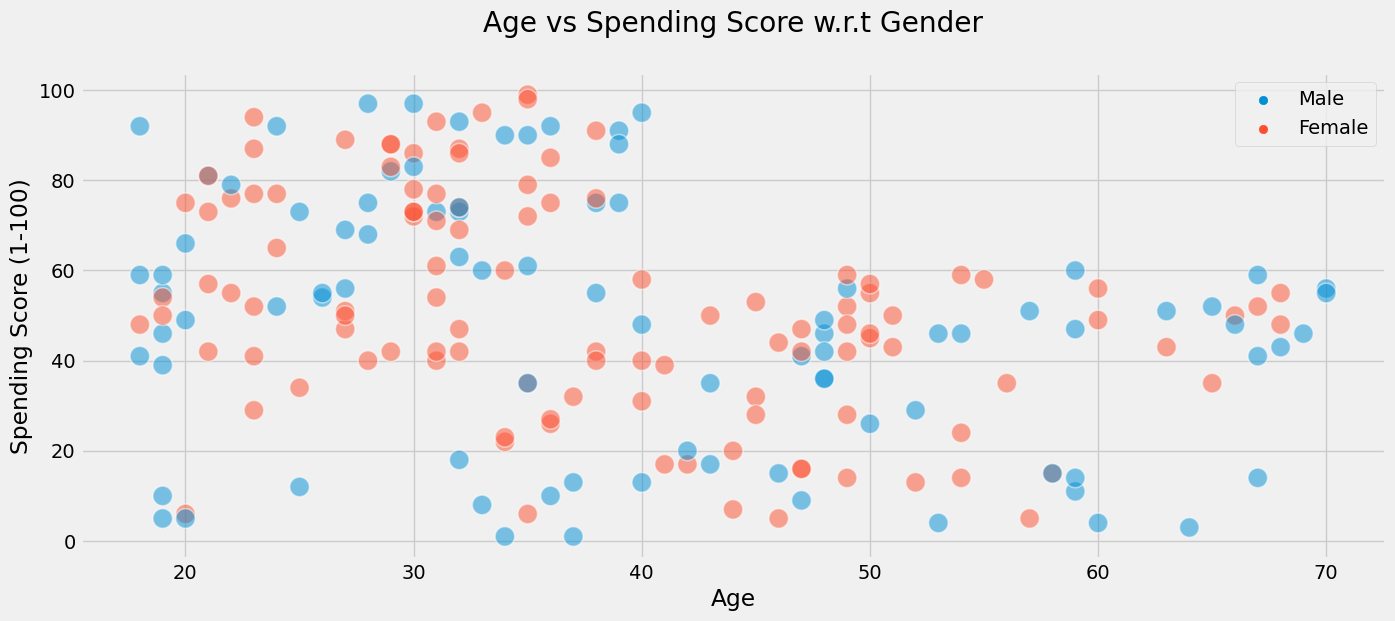

In [65]:
# Plotting scatter plot between Annual Income and Spending Score

plt.figure(figsize=(15, 6))

sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'], hue= df['Gender'], s = 200, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score w.r.t Gender\n')
plt.legend()
plt.show()

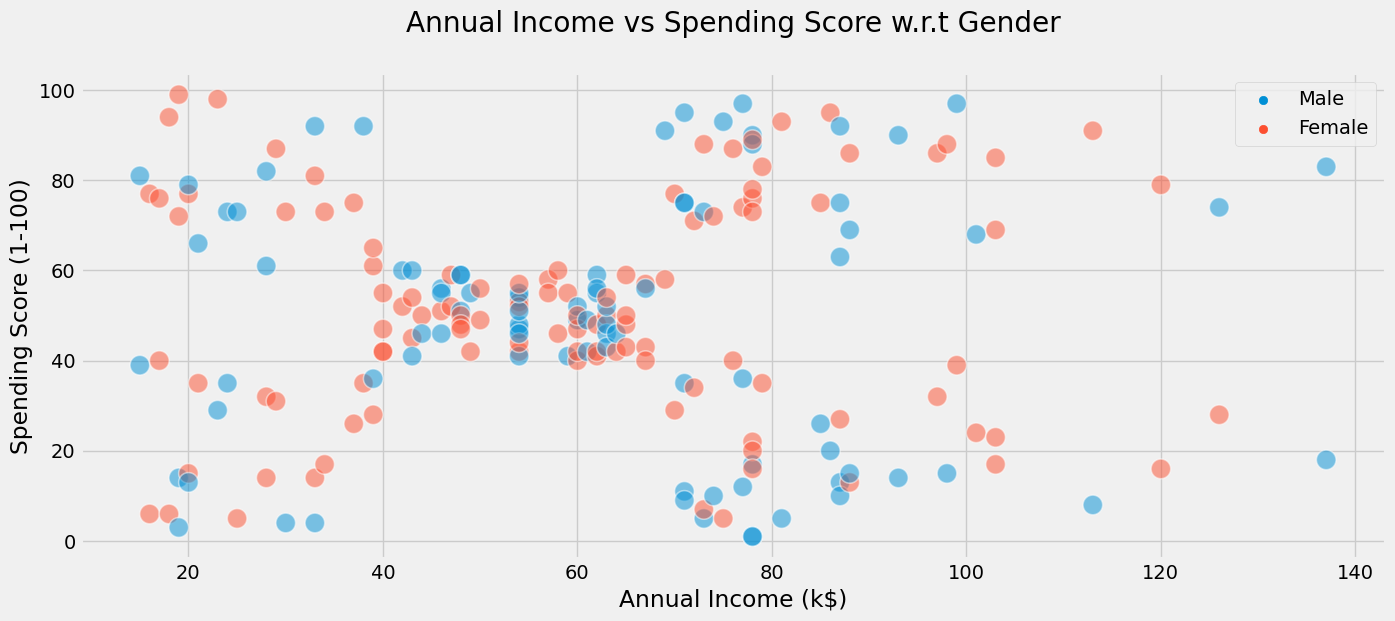

In [74]:
# Plotting scatter plot between Annual Income and Spending Score

plt.figure(figsize=(15, 6))

sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue= df['Gender'], s = 200, alpha = 0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender\n')
plt.legend()
plt.show()

### Clustering using K-means

In [81]:
def kmeans_clustering(X):
    
    sse = {}
    sil = []  
    kmax = 10
    plt.figure(figsize=(15, 5))
    
    # Elbow Method
    plt.subplot(1, 2, 1)
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 49, algorithm = 'elkan').fit(X)
        sse[k] = kmeans.inertia_
        
    sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
    plt.title('Elbow Method\n')
    plt.xlabel("Number of cluster (k)")
    plt.ylabel("Sum of Squared Error")
    
    # Silhouette Score Method
    plt.subplot(1, 2, 2)
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(X)
        labels = kmeans.labels_
        sil.append(silhouette_score(X, labels, metric = 'euclidean'))
        
    sns.lineplot(x = range(2, kmax+1), y = sil)
    plt.title('Silhouette Score Method\n')
    plt.xlabel("Number of cluster (k)")
    plt.ylabel("Silhouette Score")
    plt.show()

In [86]:
def silhouette_analysis(n_clusters, X, first_feature, second_feature):
    colors = cm.cool(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=250, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(first_feature)
    ax2.set_ylabel(second_feature)

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


plt.show()
    

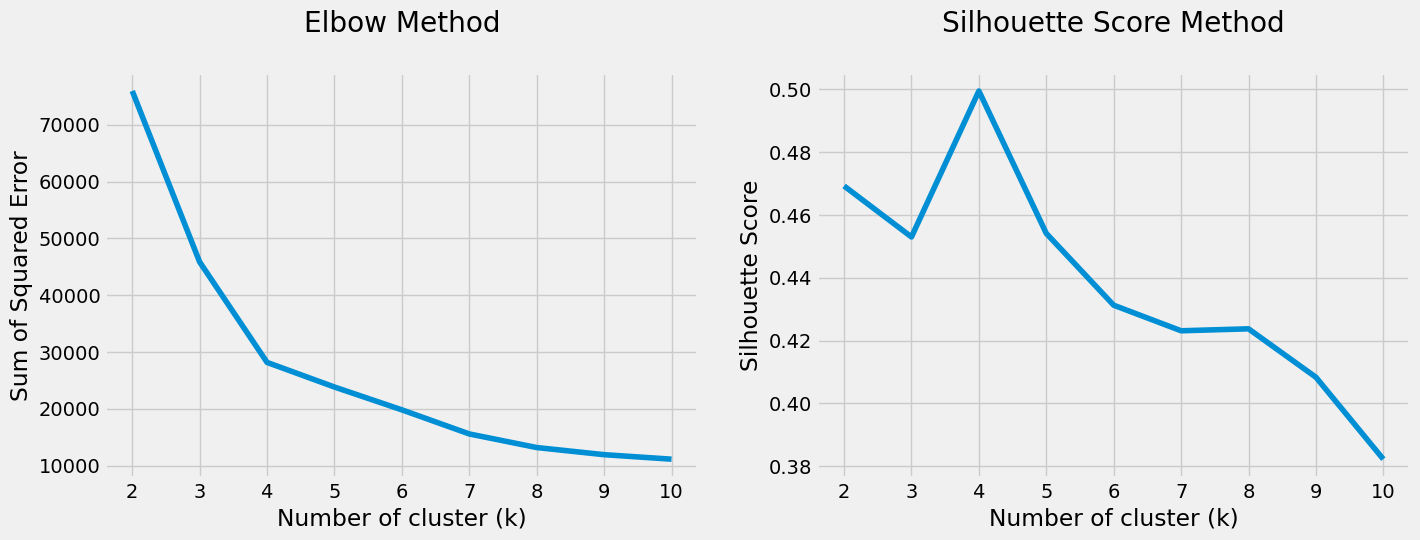

In [87]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

kmeans_clustering(X1)

In [88]:
silhouette_analysis(4 , X1, 'Age', 'Spending Score (1-100)')

NameError: name 'cluster_labels' is not defined